Enter path to .cns: WES_Tumor.cns
Enter path .bed with genes of interest: interesting_genes.bed


['chr17', '39688094', '39728658', 'ERBB2']


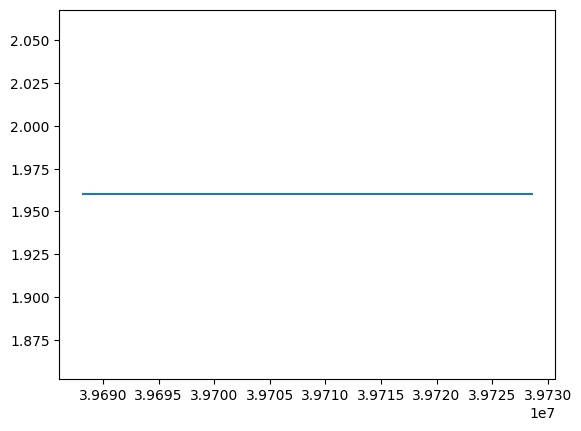

['chr17', '43044295', '43170327', 'BRCA1']


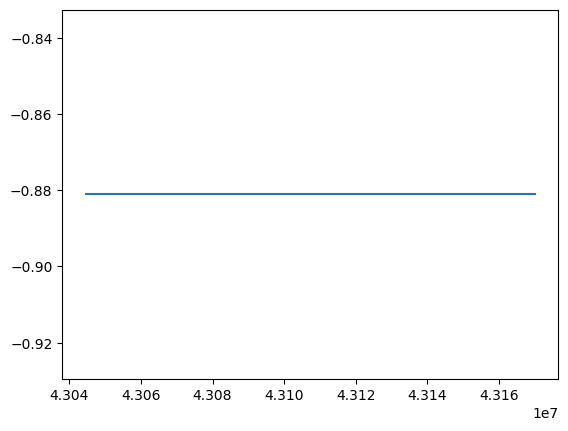

['chr13', '32315508', '32400268', 'BRCA2']


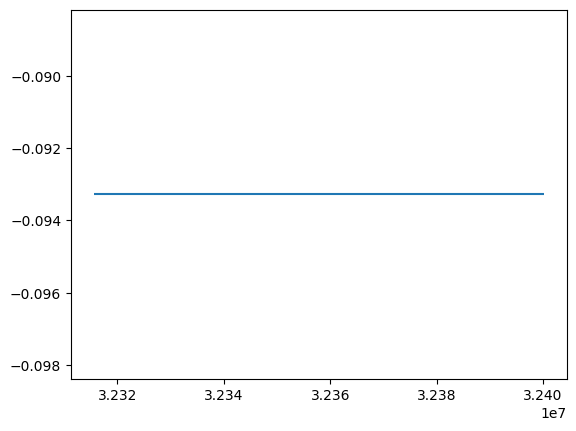

['chr11', '125625136', '125681124', 'CHEK1']


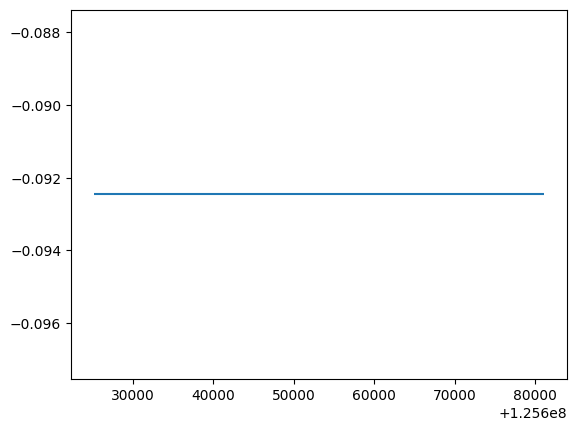

['chr22', '28687743', '28741834', 'CHEK2']


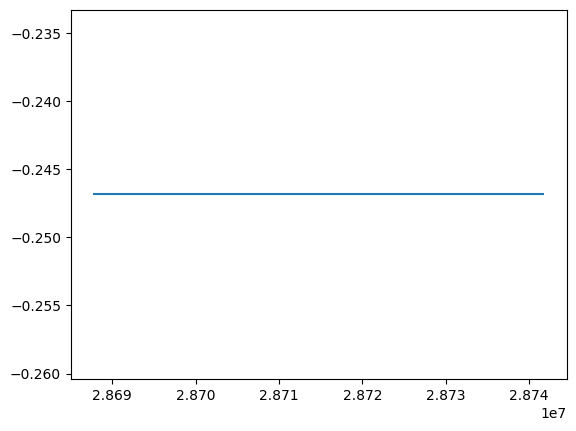

['chr7', '55019017', '55211628', 'EGFR']


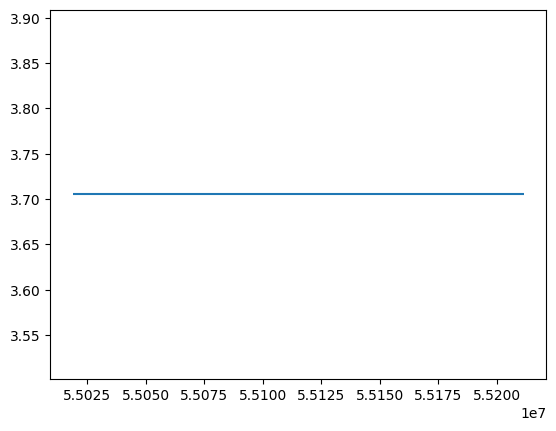

['chr8', '38411143', '38468635', 'FGFR1']


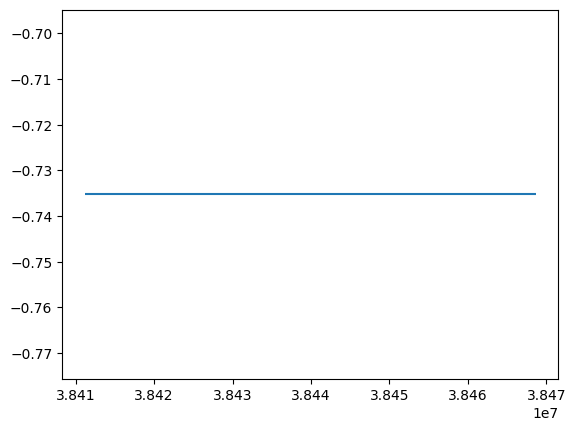

['chr10', '121478330', '121598458', 'FGFR2']


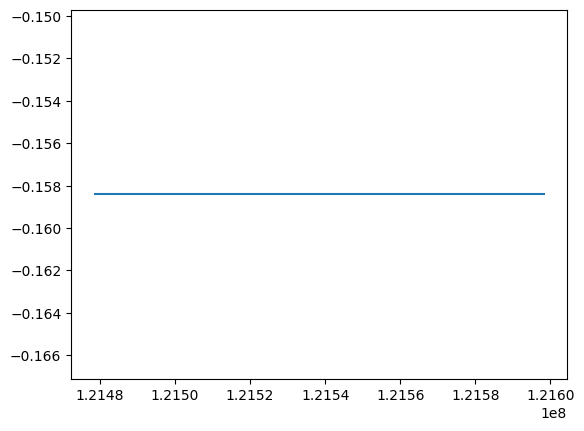

['chr4', '1793293', '1808867', 'FGFR3']


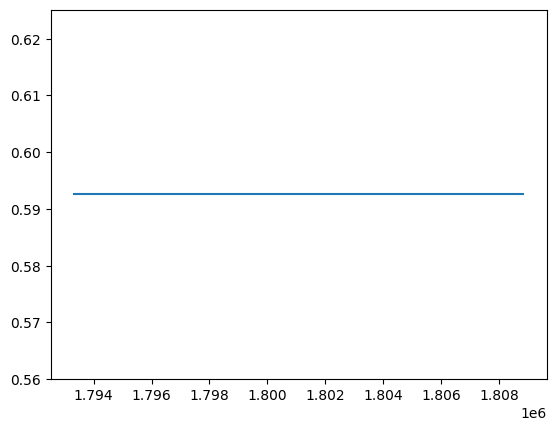

['chr7', '116672196', '116798377', 'MET']


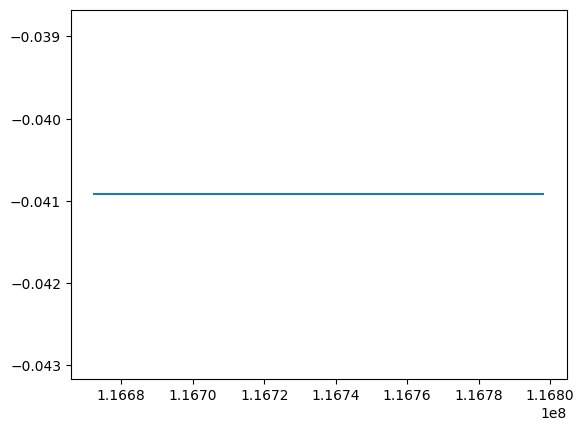

['chr9', '21802636', '21941115', 'MTAP']


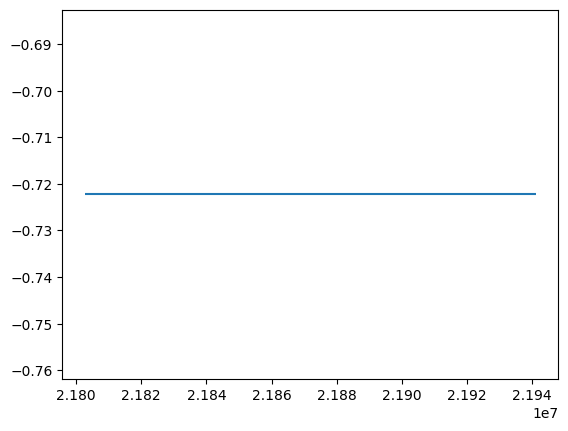

['chr12', '68808172', '68850686', 'MDM2']


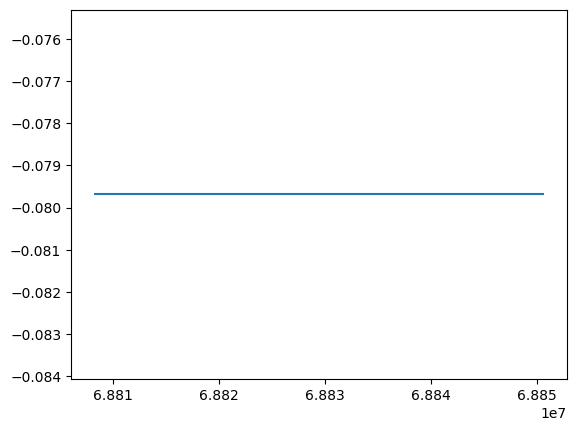

['chr17', '31094927', '31377677', 'NF1']


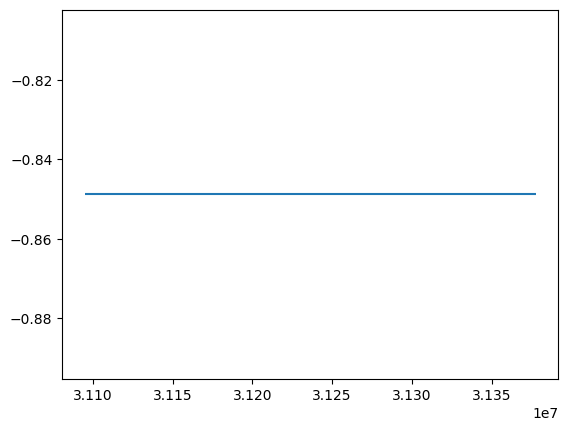

['chr1', '156815750', '156881850', 'NTRK1']


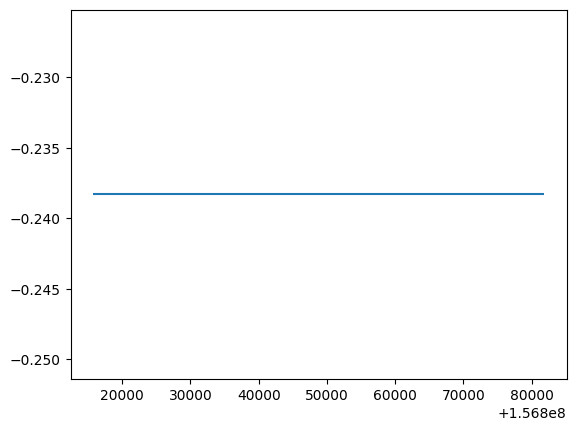

['chr16', '23603165', '23641310', 'PALB2']


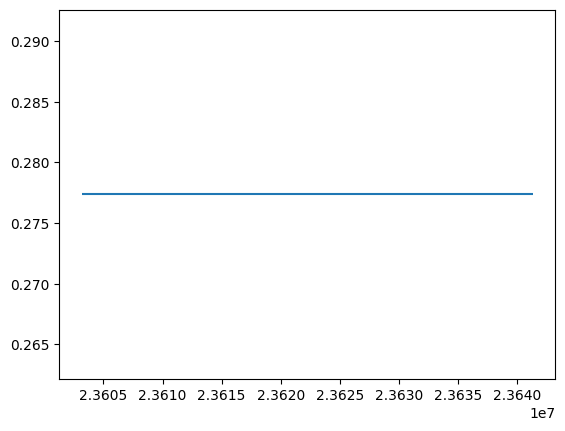

['chr13', '48303751', '48481890', 'RB1']


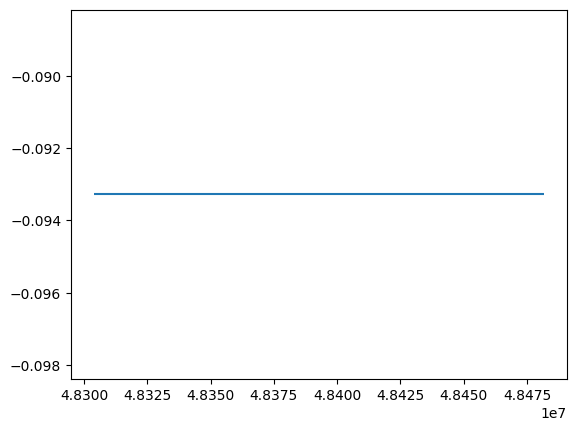

['chr19', '1205778', '1228431', 'STK11']


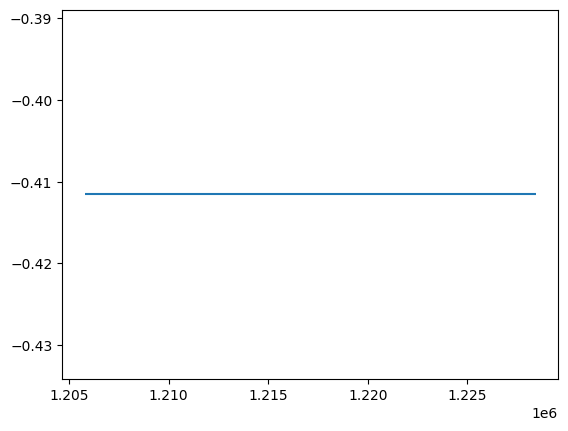

['chr9', '132891349', '132945378', 'TSC1']


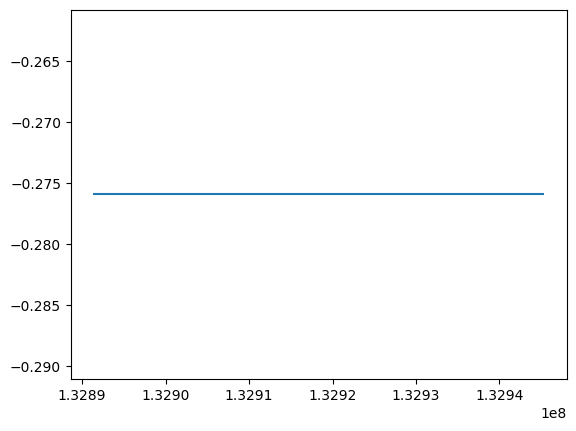

['chr16', '2047985', '2089491', 'TSC2']


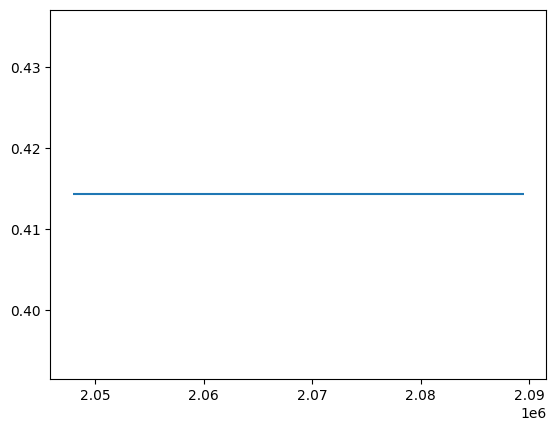

['chr17', '7668421', '7687490', 'TP53']


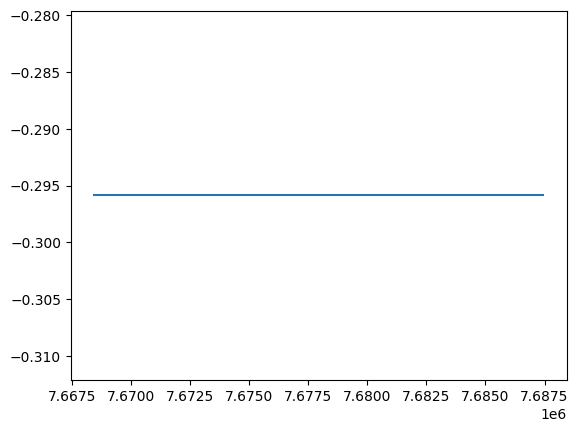

['chr9', '21967752', '21995324', 'CDKN2A']


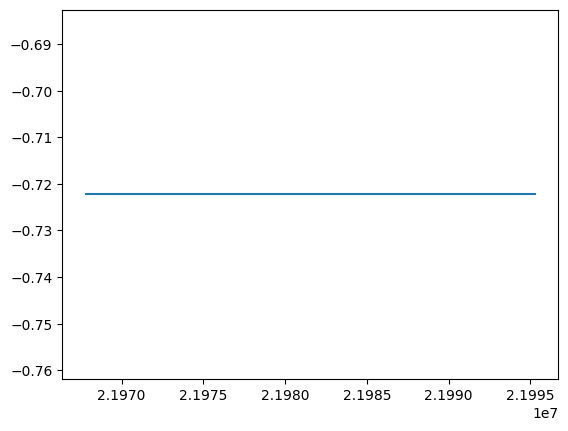

{'ERBB2': 8, 'BRCA1': 1, 'BRCA2': 2, 'CHEK1': 2, 'CHEK2': 2, 'EGFR': 26, 'FGFR1': 1, 'FGFR2': 2, 'FGFR3': 3, 'MET': 2, 'MTAP': 1, 'MDM2': 2, 'NF1': 1, 'NTRK1': 2, 'PALB2': 2, 'RB1': 2, 'STK11': 2, 'TSC1': 2, 'TSC2': 3, 'TP53': 2, 'CDKN2A': 1}


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compare_intervals(bounds, interval):
    """the function compare_intervals() receives two arguments
    args:bounds (tuple) - It represents the boundary in which the interval should lie.
    args:interval (tuple)- It represents the range of values which should lie
    within the bounds
    
    returns (tuple): It returns the interval if it's strictly within the bounds.
    But if the interval is larger than the bounds at any end (or both ends),
    then it will return the bounds as the interval. If the entire interval is out
    of the bounds, then it will return None.
    
    """
    assert isinstance(bounds, tuple) and len(bounds) == 2
    assert isinstance(interval, tuple) and len(interval) == 2

    lower_bound, upper_bound = bounds
    lower_interval, upper_interval = interval

    if lower_interval > upper_bound or upper_interval < lower_bound:
        # Whole interval is outside bounds
        return None
    
    elif lower_interval < lower_bound and upper_interval > upper_bound:
        # Interval crosses both bounds
        return (lower_bound, upper_bound)
    
    elif lower_interval < lower_bound:
        # One value of interval is outside bounds
        return (lower_bound, upper_interval)
    
    elif upper_interval > upper_bound:
        # One value of interval is outside bounds
        return (lower_interval, upper_bound) 
   
    else:
        # Interval is fully inside bounds
        return interval


def pull_from_cnvkit(path, gene_chrom, bounds):
    """this function pulls relevant segments from bed from relevant .cns cnvKit output
    args:path (string) - contains path to the .cns file
    args:gene_chrom (string) - contains chromosome name of gene of area of intrest
    args: bounds (tuple) - contains strat and end positions of area of interest
    
    returns: list of tuples with segments coordinates and list of number for
    log2 depth ratios of corresponding segments
    """
    segments = []
    depths = []
    with open(path) as f:
        f.readline()
        while True:
            line = f.readline().split()
            if len(line) == 0:
                break
            chrom, lower, upper, _, depth,*_ = line

            if chrom == gene_chrom:
                chunk = compare_intervals(bounds, (int(lower), int(upper)))
                if chunk:
                    segments.append(chunk)
                    depths.append(float(depth))
                else:
                    continue
    return segments, depths


# def pull_from_sequenza(path, gene_chrom, bounds):
#     segments = []
#     depths = []
#     with open(path) as f:
#         f.readline()
#         while True:
#             line = f.readline().split()
#             if len(line) == 0:
#                 break
#             # chrom, lower, upper, _, depth,*_ = line # For .cns file
#             chrom, lower, upper, _, _, depth,*_ = line # For .cnr file
#             if chrom == gene_chrom:
#                 chunk = compare_intervals(bounds, (int(lower), int(upper)))
#                 if chunk:
#                     segments.append(chunk)
#                     depths.append(float(depth))
#                 else:
#                     continue
#     return segments, depths


if __name__ == "__main__":
    
    cnvkit_path = input('Enter path to .cns:')
    genes_path = input('Enter path .bed with genes of interest:')
    # sequenza_path
    with open(genes_path) as f:
        genes = f.readlines()
    genes = [gene.split() for gene in genes]
    d = {}
    for gene in genes:
        gene_chrom, gene_lower, gene_upper, name = gene
        print(gene)
        segments, depths = pull_from_cnvkit(cnvkit_path, gene_chrom, tuple(
            [int(gene_lower), int(gene_upper)]))
        total_prod = 0
        total_l = 0
        for i in range(len(segments)):
            total_prod += (segments[i][1]-segments[i][0])* depths[i]
            total_l += segments[i][1]-segments[i][0]
            
        d[name] = round(2**(total_prod/total_l + 1))
        for i, segment in enumerate(segments):
            plt.hlines(depths[i], segment[0], segment[1])
        plt.show()
    print(d)
    # with open('sequenza_out/samples/Sample_segments.txt') as f:
    #     for _ in range(5):
    #         print(f.readline())